In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [131]:
file_paths = {'in':'../../data/raw/activity_log.csv',
              'out':'../../data/processed/activity_log.csv'
             }

In [132]:
df = pd.read_csv(file_paths['in'])

In [133]:
df.shape

(284, 83)

In [134]:
df.head(2)

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type"">Type</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.start_time"">Start Time</span>",Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>"
0,1595697949,"May 25, 2018, 7:47:31 PM",Rock wall,Ride,NaN,2578,11.25,NaN,NaN,False,NaN,activities/1595697949.gpx,89.811302,15.8757,2578.0,1908,11251.299800,10.0,NaN,43.765896,NaN,213.899994,227.300003,19.4,-0.047994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1617777375,"Jun 4, 2018, 11:40:17 PM",Hole back from Grand view point,Hike,NaN,3775,5.13,NaN,NaN,False,NaN,activities/1617777375.gpx,89.811302,15.8757,3775.0,3640,5130.899902,2.8,NaN,26.226250,NaN,2086.000000,2278.500000,17.4,-3.667973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.191467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Collecting Columns of Interest
Not every column of the 83 is relevant. This will be the process to remove non-useful columns and normalize the names of the remaining

In [135]:
print(list(df.columns))

['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Positive Grade', 'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time', 'Perceived Exertion', '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>', '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.ho

In [136]:
# remove any columns that contain "<span" in their name...
cols_of_interest = [x for x in df.columns if '<span' not in x]

In [137]:
# subset the dataframe to remove these <span> columns
df = df[cols_of_interest]

In [138]:
print(cols_of_interest)

['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type', 'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort', 'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High', 'Max Grade', 'Average Grade', 'Average Positive Grade', 'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts', 'Calories', 'Max Temperature', 'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 'Downhill Time', 'Other Time', 'Perceived Exertion', 'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1', 'Total Weight Lifted', 'From Upload', 'Grade Adjusted Distance', 'Weather Observation Time', 'Weather Condition', 'Weather Temperature', 'Apparent T

In [139]:
# make all column names lower case. Additionally, replace any '.' or ' ' characters with '_'
cols_of_interest = [x.lower().replace(' ','_').replace('.','_') for x in cols_of_interest]
print(cols_of_interest)

['activity_id', 'activity_date', 'activity_name', 'activity_type', 'activity_description', 'elapsed_time', 'distance', 'max_heart_rate', 'relative_effort', 'commute', 'activity_gear', 'filename', 'athlete_weight', 'bike_weight', 'elapsed_time_1', 'moving_time', 'distance_1', 'max_speed', 'average_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'average_grade', 'average_positive_grade', 'average_negative_grade', 'max_cadence', 'average_cadence', 'max_heart_rate_1', 'average_heart_rate', 'max_watts', 'average_watts', 'calories', 'max_temperature', 'average_temperature', 'relative_effort_1', 'total_work', 'number_of_runs', 'uphill_time', 'downhill_time', 'other_time', 'perceived_exertion', 'weighted_average_power', 'power_count', 'prefer_perceived_exertion', 'perceived_relative_effort', 'commute_1', 'total_weight_lifted', 'from_upload', 'grade_adjusted_distance', 'weather_observation_time', 'weather_condition', 'weather_temperature', 'apparent_t

In [140]:
# Shorten the column names by replacing 'average' with 'avg'
cols_of_interest = [x.replace('average','avg') for x in cols_of_interest]
print(cols_of_interest)

['activity_id', 'activity_date', 'activity_name', 'activity_type', 'activity_description', 'elapsed_time', 'distance', 'max_heart_rate', 'relative_effort', 'commute', 'activity_gear', 'filename', 'athlete_weight', 'bike_weight', 'elapsed_time_1', 'moving_time', 'distance_1', 'max_speed', 'avg_speed', 'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'avg_grade', 'avg_positive_grade', 'avg_negative_grade', 'max_cadence', 'avg_cadence', 'max_heart_rate_1', 'avg_heart_rate', 'max_watts', 'avg_watts', 'calories', 'max_temperature', 'avg_temperature', 'relative_effort_1', 'total_work', 'number_of_runs', 'uphill_time', 'downhill_time', 'other_time', 'perceived_exertion', 'weighted_avg_power', 'power_count', 'prefer_perceived_exertion', 'perceived_relative_effort', 'commute_1', 'total_weight_lifted', 'from_upload', 'grade_adjusted_distance', 'weather_observation_time', 'weather_condition', 'weather_temperature', 'apparent_temperature', 'dewpoint', 'humidity',

In [141]:
# Rename the columns to their lower-case, shorter forms
df.columns = cols_of_interest

In [142]:
df.head(2)

,activity_id,activity_date,activity_name,activity_type,activity_description,elapsed_time,distance,max_heart_rate,relative_effort,commute,activity_gear,filename,athlete_weight,bike_weight,elapsed_time_1,moving_time,distance_1,max_speed,avg_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,avg_grade,avg_positive_grade,avg_negative_grade,max_cadence,avg_cadence,max_heart_rate_1,avg_heart_rate,max_watts,avg_watts,calories,max_temperature,avg_temperature,relative_effort_1,total_work,number_of_runs,uphill_time,downhill_time,other_time,perceived_exertion,weighted_avg_power,power_count,prefer_perceived_exertion,perceived_relative_effort,commute_1,total_weight_lifted,from_upload,grade_adjusted_distance,weather_observation_time,weather_condition,weather_temperature,apparent_temperature,dewpoint,humidity,weather_pressure,wind_speed,wind_gust,wind_bearing,precipitation_intensity,sunrise_time,sunset_time,moon_phase,bike,gear,precipitation_probability,precipitation_type,cloud_cover,weather_visibility,uv_index,weather_ozone
0,1595697949,"May 25, 2018, 7:47:31 PM",Rock wall,Ride,NaN,2578,11.25,NaN,NaN,False,NaN,activities/1595697949.gpx,89.811302,15.8757,2578.0,1908,11251.299800,10.0,NaN,43.765896,NaN,213.899994,227.300003,19.4,-0.047994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1617777375,"Jun 4, 2018, 11:40:17 PM",Hole back from Grand view point,Hike,NaN,3775,5.13,NaN,NaN,False,NaN,activities/1617777375.gpx,89.811302,15.8757,3775.0,3640,5130.899902,2.8,NaN,26.226250,NaN,2086.000000,2278.500000,17.4,-3.667973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.191467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Checking Column Sparsity

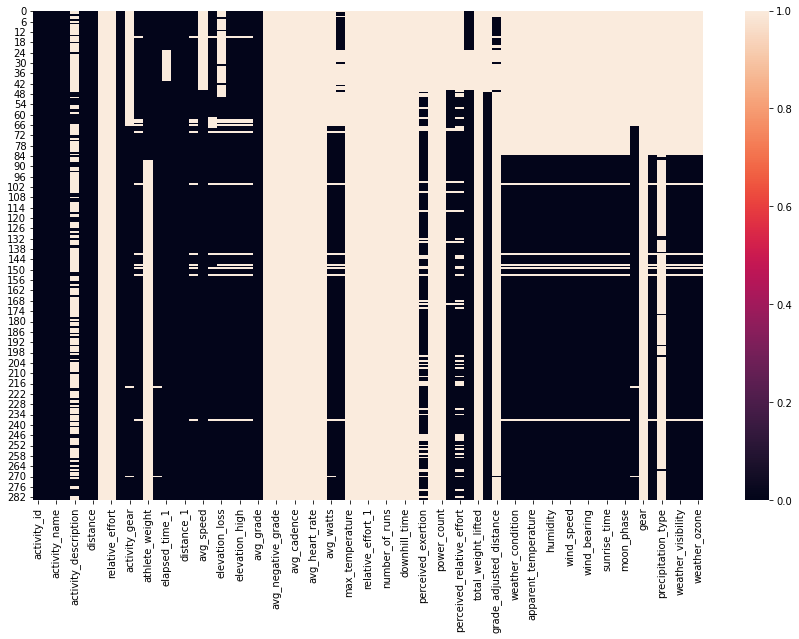

In [143]:
fig = plt.figure(figsize=(15,9))
_ = sns.heatmap(df.isna())

In [144]:
# Check each column for 100% Sparsity (all rows == NULL) and remove the column if true
n_cols_before = len(df.columns)
non_null_columns = []

for column in df.columns:
    if np.mean(df[column].isna()) < 1.0:
        non_null_columns.append(column)

df = df[non_null_columns]
print(f'Removed {n_cols_before-len(non_null_columns)} columns missing 100% of their data.')
print(f'There are {len(non_null_columns)} columns left.')

Removed 21 columns missing 100% of their data.
There are 52 columns left.


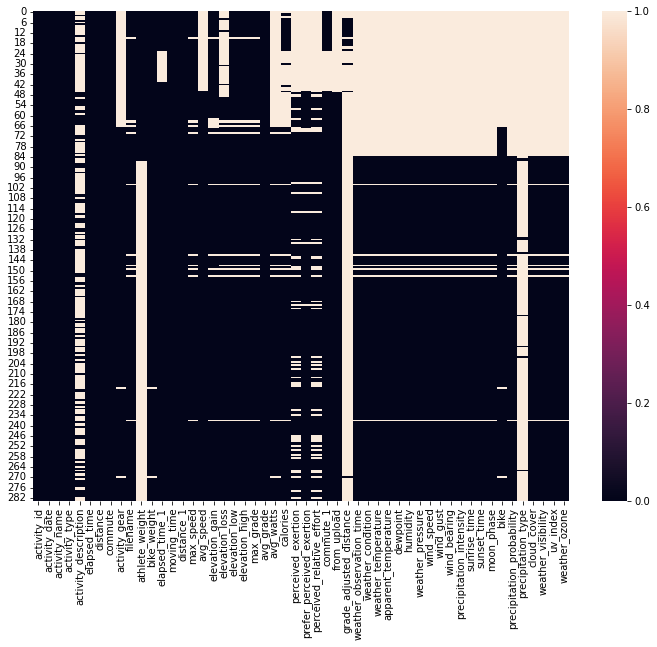

In [145]:
fig = plt.figure(figsize=(12,9))
_ = sns.heatmap(df.isna())

# 3. Pandas Profiling

In [146]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='../../data/raw/profiled_activity_log.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Profiled Activity Log Observation
- `activity_id` is a unique identifier (unique globally to all Strava activities)
- `activity_date` is a useful column that can also generate Time-of-Day and Day-of-Week columns/insights
- `activity_name` is not as useful, but the length of the name can sometimes indicate how tired or rushed I was after finishing a ride
- `activity_type` is composed of 259 rides that we care about
- `activity_description` is not useful, but perhaps the len of it is?
- `elapsed_time` is right skewed with a median time of nearly 1 hour. (units appear to be in seconds)
- `distance` is again right skewed, but the median is 13.935. Units appear to be in kilometers. (This is verified by checking against a known 50 mile ride)
- `commute` is useless. **DROP**
- `activity_gear` lists which bike I used (2 options). Useful to match to the different masses of each bike, but that is recorded in `bike_weight` so this can be dropped. **DROP**
- `filename` is a relative path the `activity_id`.gpx file. This is redundant. **DROP**
- `athlete_weight` appears to my singular weight in kilograms. I will need to revise this with a better estimate over time. **DROP and revise**
- `bike_weight` is the weight of my different bikes in kilograms
- `elapsed_time_1` appears to mostly be redudant to `elapsed_time`, however there are 18 missing values which could explain the slight quartile differences. **DROP**
- `moving_time` is the subset of `elapsed_time` in which I was actually biking.
- `distance_1` is the distance in meters. **DROP**
- `max_speed` is the max speed of a ride in meters per second. These values seem to be very tightly distributed with low skew and a few outliers
- `avg_speed` is the mean speed of a ride in meters per second (median value of this column is 5.35 m/s --> 11.96 MPH). This is left skewed with a sharp fall off for faster average rides
- `elevation_gain` is the cumulative ascent in meters
- `elevation_loss` is the cumulative descent, also in meters
- `elevation_low` and `elevation_high` are the min and max elevations for a ride, in meters. These are probably not too useful, but keep them for now.
- `max_grade` and `avg_grade` are the max and average % slope of the terrain seen over the ride (unitless)
- `avg_watts` is the average power estimate of the ride as given by Strava. Seems to be normally distributed around a mean of 97.8 Watts and with a standard deviation of 16.044 Watts
- `calories` is the estimated energy expended over the ride. Given by Strava. The shape of this distribution is similar to `distance` and `elapsed_time`
- `perceived_exertion` is my user rating of "ride difficulty" when submitting the ride. Strava has a scale for it. Ranges from 1 to 10 as integers
    - Recommend transforming to 4 categories: EASY(<5), NORMAL(5 & 6), HARD(7 & 8), MAX(9 & 10)
    - Check out the distributions of `avg_watts` for each category of exertion
- `prefer_perceived_exertion` is not clearly useful **DROP**
- `perceived_relative_effort` is a continuous scale that estimates how much cardiovascular work went into a ride ([link](https://support.strava.com/hc/en-us/articles/360000197364-Relative-Effort)). Since I lack heart rate date, this is based on `perceived_exertion`
- `commute_1` useless again so **DROP**
- `from_upload` is a flag that is True when the data is uploaded as a tracked activity. It is False when I upload an activity manually. This will be useful as a filter
- `grade_adjusted_distance` is mostly missing and I'm not sure what it represents. **DROP**
- `weather_observation_time` is a timestamp in UTC seconds. The first 90 values are missing because I was not a subscribed Strava member until April 26th, 2020.
- `weather_condition` appears to be a categorical variable from 1 to 6. Not sure what each enumerated category is though. **DROP**
- `weather_temperature` is the temperature at the observation time (Celcius)
- `apparent_temperature` is likely the wind-chill adjust temperature (Celcius)
- `dewpoint` the dewpoint is the temperature (Celcius) that air would need to be cooled to achieve 100% relative humidity. Dew points closer to the weather temperature will be more humid and oppressive to ride in
- `humidity` seems to vary between 0.0 and 1.0, indicating it is the relative humidity
- `weather_pressure` is the atmospheric pressure in what appears to be millibars
- `wind_speed` is the speed component of wind velocity measured in meters per second
- `wind_gust` is the peak gust speeds of the ride in meters per second
- `wind_bearing` is the direction of the wind's velocity. It seems to be measured in degress where the mean value is 190. Since wind mostly came out of the West in Columbus, OH this might indicate that 180 is West?
- `precipitation_intensity` is mostly 0 since I don't typically ride in the rain. **DROP**
- `sunrise_time` is the UTC timestamp for sunrise
- `sunset_time` is the UTC timestamp for sunset
- `moon_phase` seems to be a percentage of the moon cycle. **DROP**
- `bike` might be a UUID of my bikes on Strava **DROP**
- `precipitation_probability` is not relevant... **DROP**
- `precipitation_type` is a categorical variable that isn't relevant **DROP**
- `cloud_cover` is the percentage of cloud cover on the ride. This could be good for a UV factor or relative shade factor, but probably isn't needed. **DROP**
- `weather_visibility` is probably the range in meters of clear sight. **DROP**
- `uv_index` is the scale from 0 to 9 of UV intensity. I probably didn't wear sunscreen for most of these rides. **DROP**
- `weather_ozone` is probably the concentration of ozone in some metric units. **DROP**

# 4. Final Transformations
**Note**: we will keep metric units as the same units unless for plotting purposes. This is because the Average Power is in Watts, a metric quantity

## 4a. Grabbing the Columns of Interest

In [147]:
cols_to_keep = ['activity_id', 'activity_date', 'activity_name', 'activity_type', 'activity_description', 'from_upload',
                'elapsed_time', 'distance', 'bike_weight', 'moving_time', 'max_speed', 'avg_speed', 
                'elevation_gain', 'elevation_loss', 'elevation_low', 'elevation_high', 'max_grade', 'avg_grade', 
                'avg_watts', 'calories', 'perceived_exertion', 'perceived_relative_effort',
                'weather_observation_time', 'weather_temperature','apparent_temperature','humidity','weather_pressure', 
                'wind_speed', 'wind_gust', 'wind_bearing', 'sunrise_time', 'sunset_time',
               ]

In [148]:
df = df[cols_to_keep]

## 4b. Filtering out for Tracked Rides
I only want to analyze the bike ride activities that were not manually uploaded

In [149]:
# construct the filters
filt_ride_type = df.loc[:,'activity_type'] == 'Ride'
filt_non_manual_upload = df.loc[:, 'from_upload'] == 1
filt_overall = filt_ride_type & filt_non_manual_upload

In [150]:
# apply the filters
df = df.loc[filt_overall, :].reset_index()

In [151]:
# get rid of these now constant columns
df.drop(['activity_type','from_upload'], axis=1, inplace=True)

In [152]:
df.shape

(226, 31)

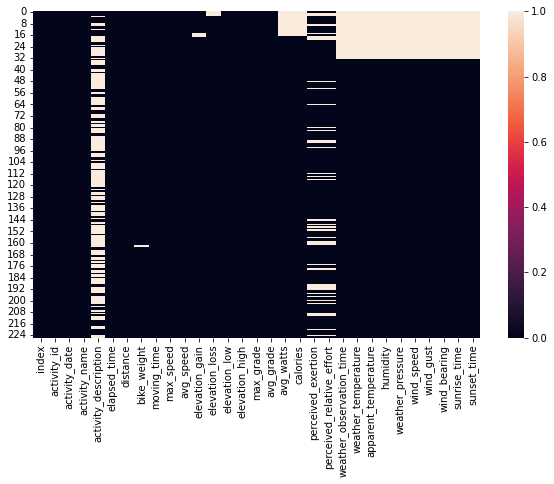

In [153]:
fig = plt.figure(figsize=(10,6))
_ = sns.heatmap(df.isna())